<a href="https://colab.research.google.com/github/nickname8888/Quaternions-LPI/blob/main/tf-nst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [4]:
os.chdir('/content/drive/MyDrive/datasets/models/tf-nst')

In [108]:
content_image = load_image('11.jpg')
style_image = load_image('style12.jpg')

In [109]:
content_image.shape

TensorShape([1, 172, 100, 3])

In [110]:
style_image.shape

TensorShape([1, 225, 225, 3])

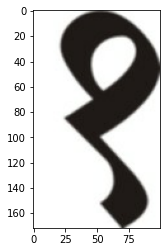

In [111]:
plt.imshow(np.squeeze(content_image))
plt.show()

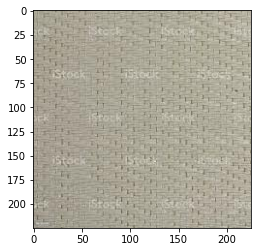

In [112]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [113]:
# si = style_image
# si = tf.image.adjust_brightness(si, delta=0.5)

In [114]:
# plt.imshow(np.squeeze(si))
# plt.show()

In [115]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

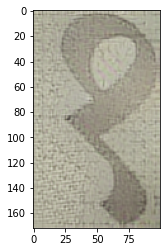

In [116]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [117]:
cv2.imwrite('11+style12.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True